In [19]:
# import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier

print(tf.__version__)

2.2.0


In [20]:
data = pd.read_csv('train_data.csv')
dataT = pd.read_csv('test_data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BookingID                29020 non-null  int64  
 1   LeadTime                 29020 non-null  int64  
 2   ArrivalYear              29020 non-null  int64  
 3   ArrivalMonth             29020 non-null  int64  
 4   ArrivalDate              29020 non-null  int64  
 5   NumWeekendNights         29020 non-null  int64  
 6   NumWeekNights            29020 non-null  int64  
 7   MealPlan                 29020 non-null  object 
 8   Parking                  29020 non-null  int64  
 9   RoomType                 29020 non-null  object 
 10  NumAdults                29020 non-null  int64  
 11  NumChildren              29020 non-null  int64  
 12  MarketSegment            29020 non-null  object 
 13  RepeatedGuest            29020 non-null  int64  
 14  NumPrevCancellations  

In [21]:
data['MealPlan'] = pd.factorize(data.MealPlan)[0]
data['RoomType'] = pd.factorize(data.RoomType)[0]
data['MarketSegment'] = pd.factorize(data.MarketSegment)[0]
data['BookingStatus'] = pd.factorize(data.BookingStatus)[0]

dataT['MealPlan'] = pd.factorize(dataT.MealPlan)[0]
dataT['RoomType'] = pd.factorize(dataT.RoomType)[0]
dataT['MarketSegment'] = pd.factorize(dataT.MarketSegment)[0]
dataT['BookingStatus'] = pd.factorize(dataT.BookingStatus)[0]

data

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,RoomType,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus
0,1,10,2018,3,31,0,1,0,0,0,1,0,0,0,0,0,95.00,0,0
1,2,116,2018,2,28,2,1,0,0,0,1,0,1,0,0,0,61.00,0,0
2,3,11,2018,7,25,1,2,0,0,0,2,1,1,0,0,0,129.75,1,1
3,4,3,2017,9,12,0,1,0,0,0,2,0,1,0,0,0,152.00,3,1
4,5,28,2018,3,7,1,3,0,0,0,2,0,2,0,0,0,87.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,29016,2,2018,11,21,1,2,0,0,0,1,0,1,0,0,0,100.67,1,1
29016,29017,18,2018,4,12,0,2,2,0,0,2,0,1,0,0,0,119.00,1,1
29017,29018,8,2017,9,29,0,3,0,0,0,1,0,0,0,0,0,65.00,0,1
29018,29019,20,2018,9,18,2,2,0,0,0,1,0,2,0,0,0,90.00,0,0


In [22]:
features = ['LeadTime', 'ArrivalYear', 'ArrivalMonth', 'ArrivalDate', 'NumWeekendNights', 
            'NumWeekNights', 'MealPlan', 'Parking', 'RoomType', 'NumAdults', 'NumChildren', 
            'MarketSegment', 'RepeatedGuest', 'NumPrevCancellations', 'NumPreviousNonCancelled', 
            'AvgRoomPrice', 'SpecialRequests']
target = 'BookingStatus'

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=24)

X_train


,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,RoomType,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests
12685,55,2017,11,10,0,1,0,0,0,1,0,1,0,0,0,73.80,2
18332,34,2018,9,2,0,1,2,0,0,2,0,1,0,0,0,99.00,1
25208,50,2018,3,21,1,3,0,0,0,2,0,1,0,0,0,93.50,1
26777,265,2018,6,24,0,2,1,0,0,2,0,2,0,0,0,115.00,1
6738,13,2018,3,20,1,0,0,0,0,2,0,2,0,0,0,85.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19857,205,2018,9,5,1,2,0,0,0,2,0,1,0,0,0,126.90,2
24919,21,2017,8,31,1,3,0,0,0,1,0,1,0,0,0,91.25,1
14528,54,2018,3,2,0,2,0,0,0,2,0,1,0,0,0,87.30,0
899,6,2018,4,22,2,3,0,0,0,1,2,1,0,0,0,104.92,1


In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)

X_train

array([[-0.34972465, -2.13714438,  1.17430205, ..., -0.08527459,
        -0.84880007,  1.74771449],
       [-0.59462298,  0.46791411,  0.52247667, ..., -0.08527459,
        -0.1272976 ,  0.47831956],
       [-0.40803378,  0.46791411, -1.43299946, ..., -0.08527459,
        -0.28476838,  0.47831956],
       ...,
       [-0.36138648,  0.46791411, -1.43299946, ..., -0.08527459,
        -0.46228089, -0.79107537],
       [-0.92115409,  0.46791411, -1.10708677, ..., -0.08527459,
         0.04219822,  0.47831956],
       [ 2.43745156,  0.46791411,  0.84838936, ..., -0.08527459,
        -0.76920575,  0.47831956]])

Feature: 0, Score: -1.26199
Feature: 1, Score: -0.24486
Feature: 2, Score: 0.13211
Feature: 3, Score: 0.00726
Feature: 4, Score: -0.17825
Feature: 5, Score: -0.10031
Feature: 6, Score: -0.17701
Feature: 7, Score: 0.22975
Feature: 8, Score: 0.08131
Feature: 9, Score: -0.11012
Feature: 10, Score: -0.01532
Feature: 11, Score: 0.57612
Feature: 12, Score: 0.43864
Feature: 13, Score: -0.10936
Feature: 14, Score: 0.14434
Feature: 15, Score: -0.66152
Feature: 16, Score: 1.02342


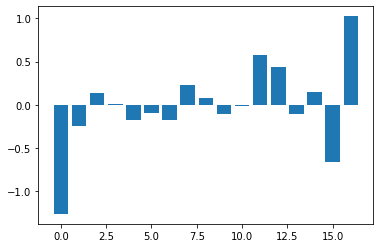

In [25]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [26]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# MODEL 1: accuracy aroud 80% ish
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.86%


In [27]:
a = dataT[features]
a = scaler.transform(a)
b = model.predict(a)

dataT[target] = b
dataT


,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,RoomType,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus
0,29020,211,2018,5,20,0,2,0,0,0,2,0,0,0,0,0,100.00,0,0
1,29021,121,2018,7,6,0,4,0,0,0,3,0,1,0,0,0,96.90,1,1
2,29022,30,2018,11,26,2,1,1,0,0,2,0,0,0,0,0,88.00,0,0
3,29023,256,2018,6,15,0,2,2,0,0,2,0,0,0,0,0,115.00,1,0
4,29024,122,2018,11,25,0,1,0,0,0,1,0,2,0,0,0,67.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,36270,65,2018,7,27,0,3,0,0,3,2,2,0,0,0,0,177.30,0,0
7251,36271,28,2018,9,18,2,0,0,0,0,2,0,0,0,0,0,149.00,1,1
7252,36272,116,2018,2,28,2,1,0,0,0,1,0,0,0,0,0,1.00,0,1
7253,36273,148,2018,7,1,2,6,0,0,0,2,0,0,0,0,0,98.39,2,1


In [28]:
dataT.to_csv("pred_1.csv")